In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("/Users/allisterkohn/Desktop/RFTM/Webscraping/Matches.csv")
df = df[["Total Points", "Aces", "Double Faults", "Service Points", "First Serve Points", "Second Serve Points", "Opponent Aces", "Nber of Sets", "Time", "Abandon", "W/O", "RF Win"]]
df.head()

,Total Points,Aces,Double Faults,Service Points,First Serve Points,Second Serve Points,Opponent Aces,Nber of Sets,Time,Abandon,W/O,RF Win
0,181.0,5.0,3.0,93.0,60.0,33.0,10.0,3,109.0,0,0,0
1,186.0,4.0,1.0,78.0,47.0,31.0,4.0,3,131.0,0,0,1
2,246.0,7.0,0.0,114.0,76.0,38.0,12.0,4,155.0,0,0,1
3,191.0,10.0,0.0,95.0,62.0,33.0,3.0,3,111.0,0,0,1
4,242.0,16.0,3.0,112.0,68.0,44.0,5.0,6,164.0,1,0,1


In [30]:
df.describe(include='all')

,Total Points,Aces,Double Faults,Service Points,First Serve Points,Second Serve Points,Opponent Aces,Nber of Sets,Time,Abandon,W/O,RF Win
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1581.000000,1424.000000,1581.000000,1581.000000,1581.000000
mean,161.591907,7.832647,1.878601,78.007545,48.465706,29.541838,4.875857,2.654016,101.931882,0.013283,0.012018,0.815307
std,57.201268,4.751994,1.832654,28.717531,18.331216,12.251481,4.473251,0.781813,40.291492,0.114519,0.108999,0.388171
min,14.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000
25%,119.000000,4.250000,1.000000,56.250000,35.000000,21.000000,2.000000,2.000000,72.000000,0.000000,0.000000,1.000000
50%,151.000000,7.000000,1.000000,73.000000,45.000000,27.000000,4.000000,3.000000,94.000000,0.000000,0.000000,1.000000
75%,192.000000,10.000000,3.000000,93.000000,58.000000,36.000000,7.000000,3.000000,121.250000,0.000000,0.000000,1.000000
max,436.000000,50.000000,12.000000,203.000000,133.000000,89.000000,33.000000,6.000000,305.000000,1.000000,1.000000,1.000000


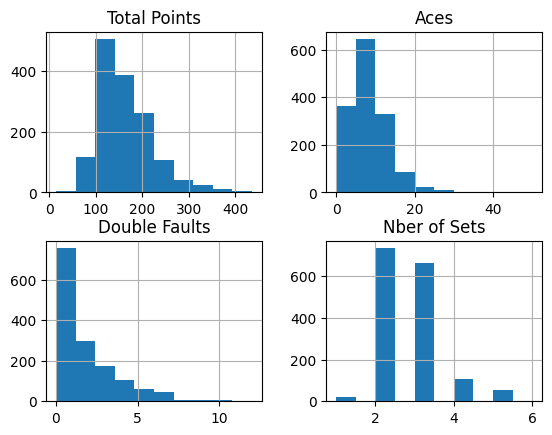

In [31]:
viz = df[['Total Points', 'Aces','Double Faults', 'Nber of Sets']]
viz.hist()
plt.show()

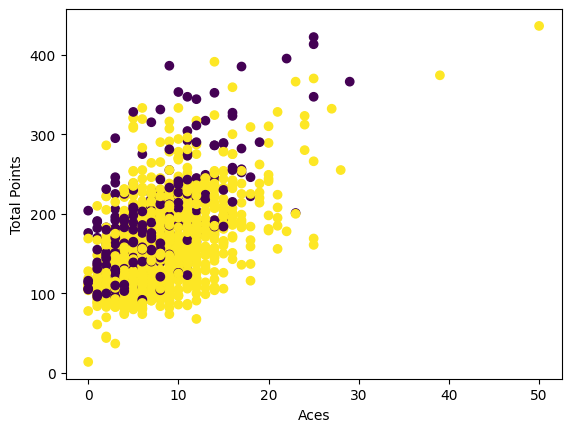

In [32]:
plt.scatter(df['Aces'], df['Total Points'], c=df['RF Win'])
plt.xlabel("Aces")
plt.ylabel("Total Points")
plt.show()

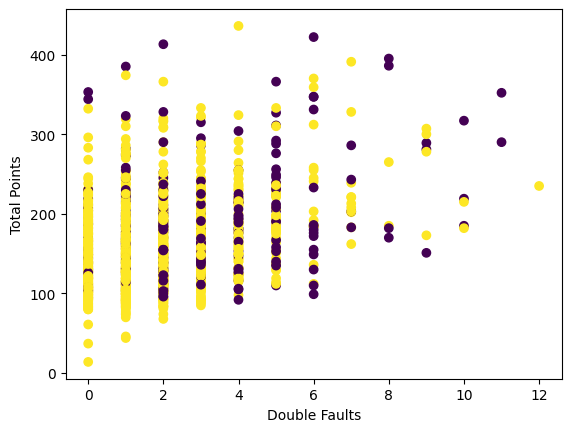

In [33]:
plt.scatter(df['Double Faults'], df['Total Points'],  c=df['RF Win'])
plt.xlabel("Double Faults")
plt.ylabel("Total Points")
plt.show()

In [39]:
df = df.dropna()

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()



x = np.array(train[['Aces','Double Faults','Time']])
y = np.array(train[['Total Points']])

lr.fit(x, y)

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print("y =", lr.coef_[0][0], "x1 +", lr.coef_[0][1], "x2 +", lr.coef_[0][2], "x3 +", lr.intercept_[0])

Coefficients: [[1.04618294 1.92536854 1.29876776]]
Intercept: [17.80154068]
y = 1.0461829444389954 x1 + 1.925368541274735 x2 + 1.2987677628192598 x3 + 17.801540684478084


In [41]:
y_hat = lr.predict(test[['Aces','Double Faults','Time']])
x = np.array(test[['Aces','Double Faults','Time']])
y = np.array(test[['Total Points']])

print("Mean absolute error: ", round(np.mean(np.absolute(y_hat - y)), 2))
print("Residual sum of squares:", round(np.mean((y_hat - y) ** 2), 2))
print('Variance score:',  round(lr.score(x, y), 2))

Mean absolute error:  10.35
Residual sum of squares: 279.08
Variance score: 0.93


In [49]:
pred = np.array([[3, 1, 90]]) #3 aces, 1 double faute, 110 minutes de matchs
prediction = lr.predict(pred)
print("Prédicition :",  prediction)

Prédicition : [[139.75455671]]


In [45]:
df.to_csv("a.csv")